# Logistic Regression

> Apart from Linear Regression where predicted value is ***Continous*** in nature, Logistic Regression predicts ***Categorical Value***

#### Definition

* **Logistic regression is a data analysis technique that uses mathematics to find the relationships between two data factors. It then uses this relationship to predict the value of one of those factors based on the other. The prediction usually has a finite number of outcomes.**

* **Prediction in Logistic Regression can be performed on two types of Classification datasets :-**

    1) **BINARY CLASSIFICATION** (classifies on the basis of Yes or No)
    2) **MULTICLASS CLASSIFICATION** (classifies on the basis of more than two categories)

* **In Logistic Regression, ***S shape curve*** is predicted in a dataset to differentiate the values in the data set. Whereas, Linear Regression designs a straight line**

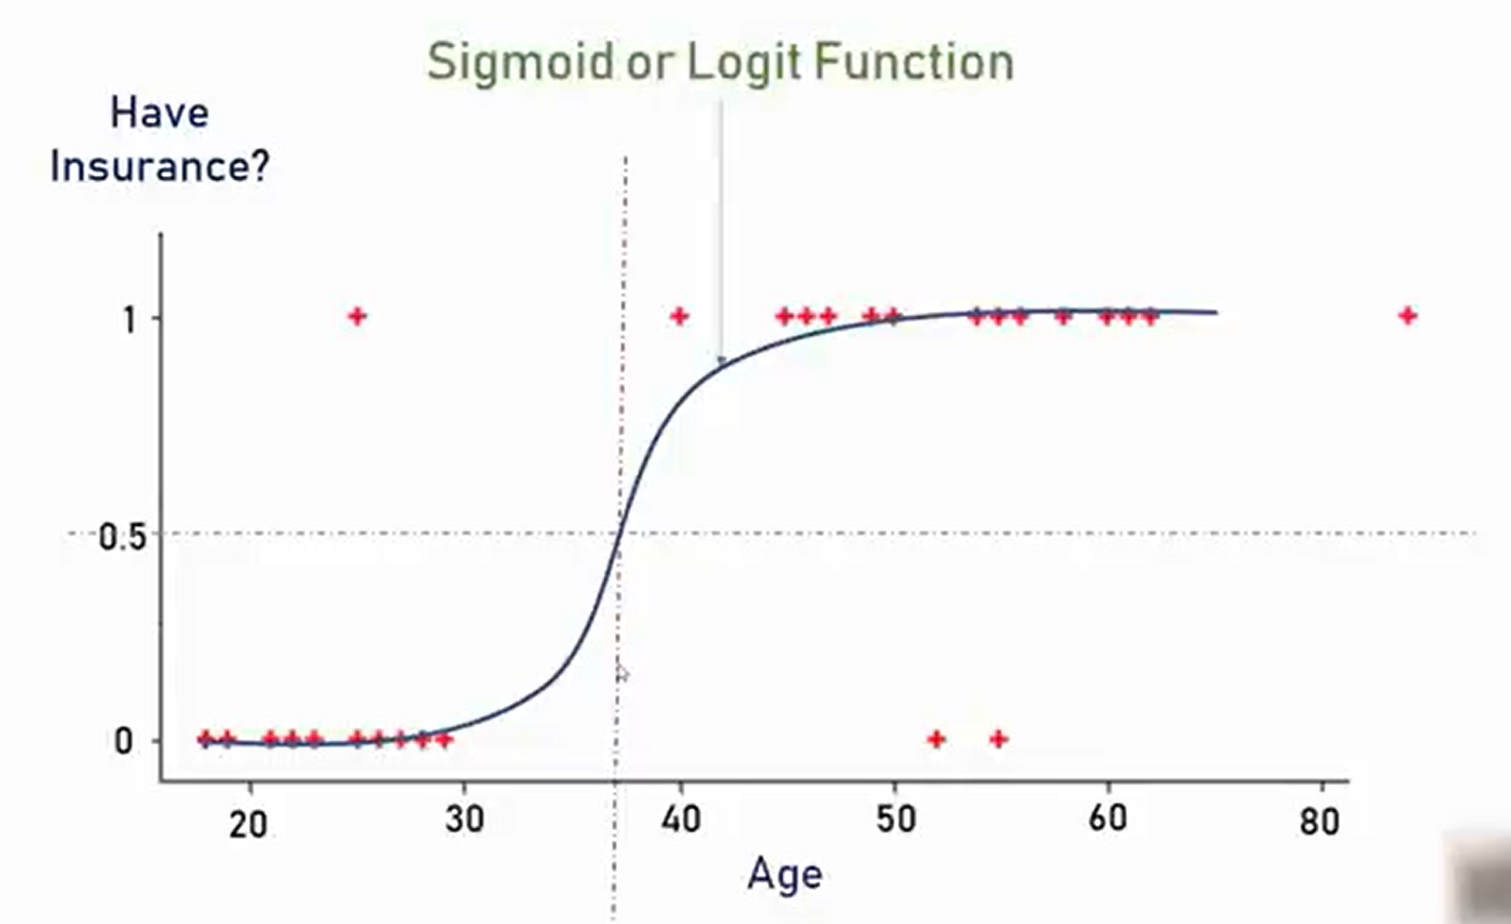
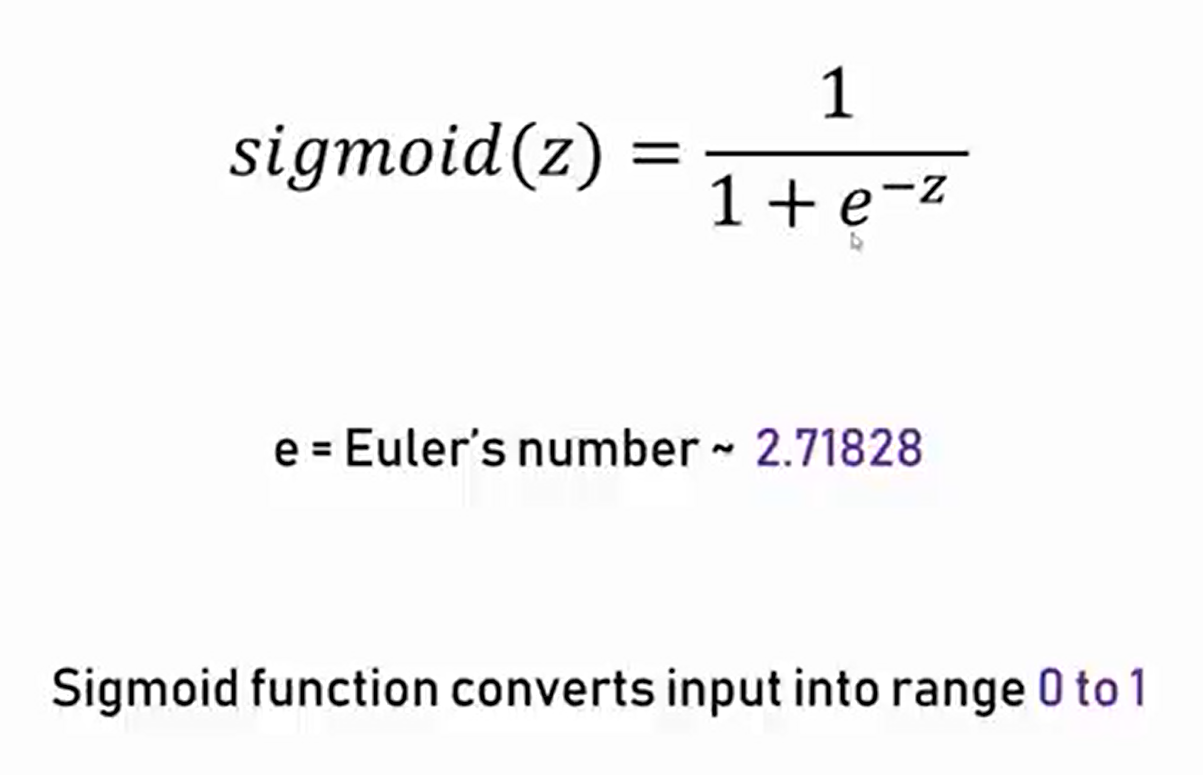
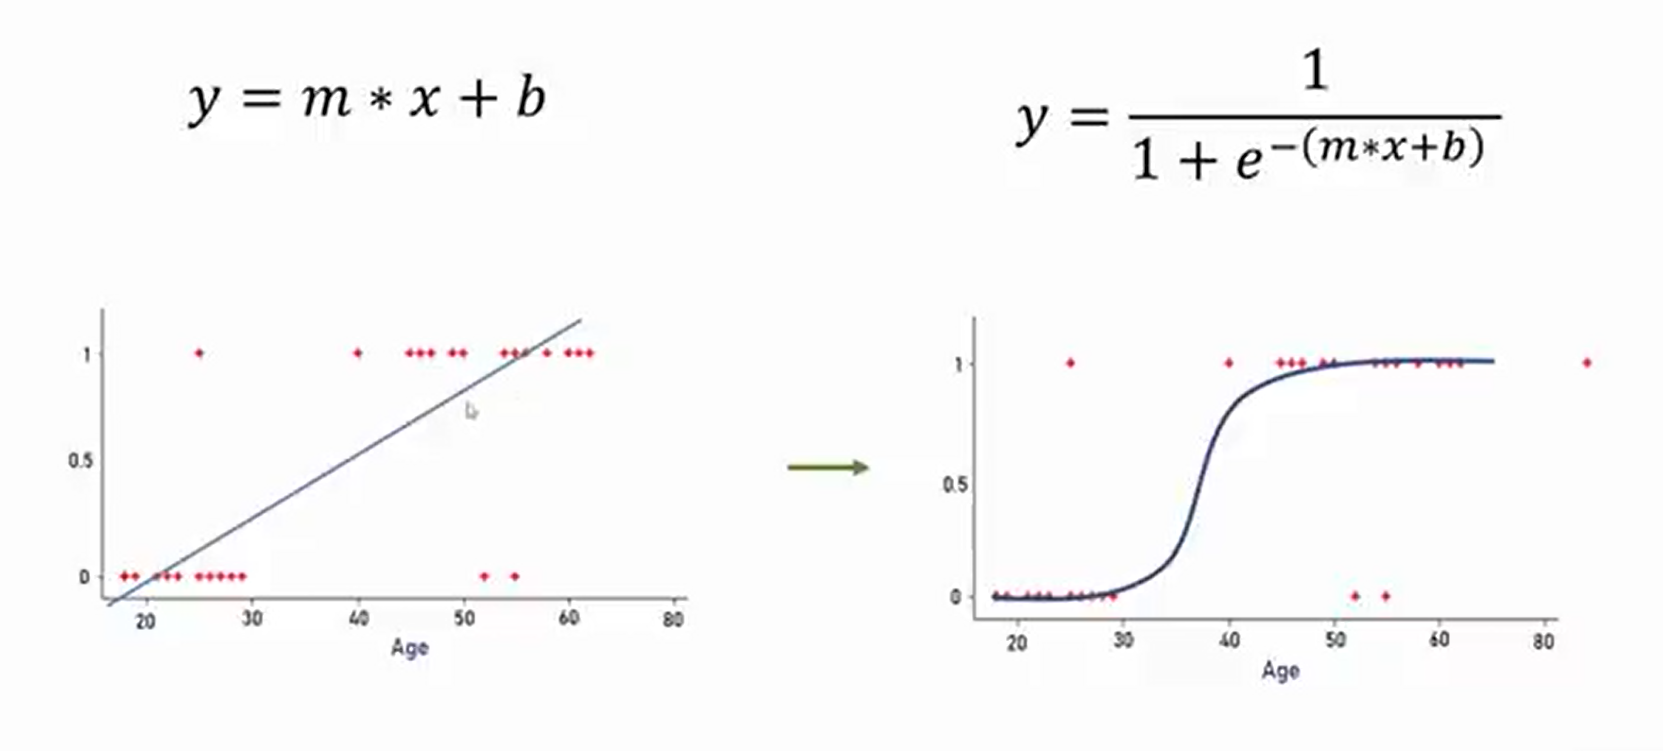

<h2 style="color:green;text-align:center">Predicting if a person would buy life insurnace based on his age using logistic regression</h1>

In [51]:
import pandas as pd

df = pd.read_csv("ML Practice Files/Logistic Regression/insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [52]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df[['age']],df.bought_insurance,test_size=0.1,random_state=2)

x_test

,age
25,54
0,22
9,61


In [53]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)
model.predict(x_test)

array([1, 0, 1])

In [54]:
model.score(x_test,y_test)

1.0

<h1 style="color:green">Exercise</h1>

**Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.**

    1) Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
    2) Plot bar charts showing impact of employee salaries on retention
    3) Plot bar charts showing corelation between department and employee retention
    4) Now build logistic regression model using variables that were narrowed down in step 1
    5) Measure the accuracy of the model

In [55]:
import pandas as pd 

df2 = pd.read_csv("ML Practice Files/Logistic Regression/HR_comma_sep.csv")
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Exploratory Data Analysis (EDA)
    Find out which variables have direct and clear impact on employee retention

In [56]:
numeric_df = df2.drop(['Department','salary'],axis="columns")
numeric_df.groupby('left').mean()         # This calculates all average values of each column , grouped by left values

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Here we can see that,
* **satisfaction_level** - Employees who left have less satisfaction level. (0.44 vs 0.66)
* **average_montly_hours** - Employees who left have more average monthly hours. (207 vs 199)
* **promotion_last_5years** - Employees who left have get less promotions. (0.005 vs 0.026)

### Bar chart showing impact of employees salaries on retention

<Axes: xlabel='salary'>

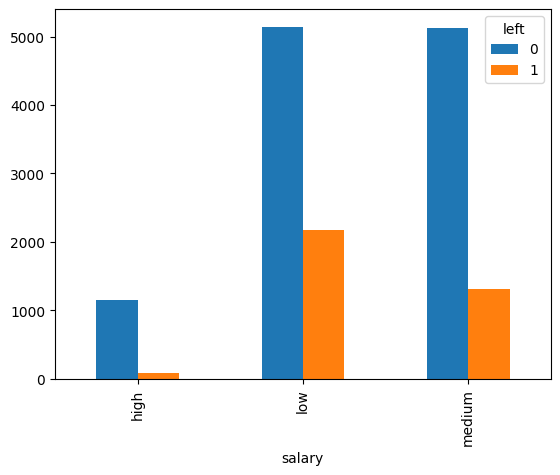

In [57]:
import matplotlib.pyplot as plt

pd.crosstab(df2.salary,df2.left).plot(kind="bar")

### Bar chart showing correlation between departments and employee retention

<Axes: xlabel='Department'>

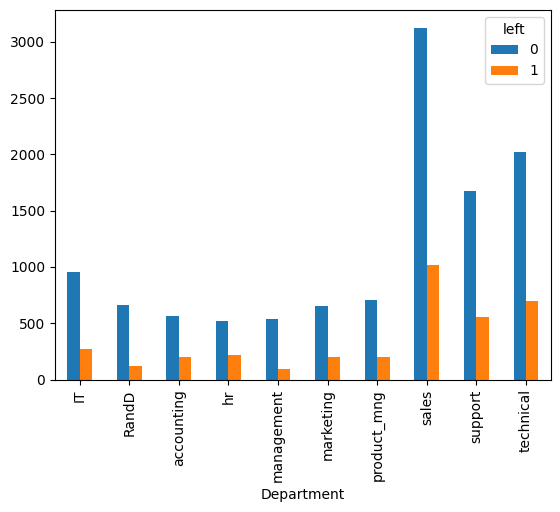

In [58]:
pd.crosstab(df2.Department,df2.left).plot(kind="bar")

### build logistic regression model using variables 

In [59]:
final_df = df2.drop(['last_evaluation','number_project','time_spend_company','Work_accident','Department','salary'],axis="columns")
final_df.head()                    # Necessary variables

,satisfaction_level,average_montly_hours,left,promotion_last_5years
0,0.38,157,1,0
1,0.80,262,1,0
2,0.11,272,1,0
3,0.72,223,1,0
4,0.37,159,1,0


In [60]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(df2[['satisfaction_level','average_montly_hours','promotion_last_5years']],df2.left,test_size=0.3,random_state=10)
x_test.head()

,satisfaction_level,average_montly_hours,promotion_last_5years
13982,0.65,125,0
822,0.41,128,0
13751,0.44,125,0
9656,0.93,190,0
13497,0.76,170,0


In [61]:
from sklearn.linear_model import LogisticRegression 

model2 = LogisticRegression()
model2.fit(x_train,y_train)
model2.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
model2.score(x_test,y_test)

0.7715555555555556